In [34]:
"""
Data from spreadsheet
"""

years = [1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965]
rice_production = [-39.69, -7.51, -44.61, 0, -32.53, -43.36, -59.23, -76.33, -85.63, -23.83, -30.49, -29.0]

positive_rice_production = [(val + 100.0) * 3 for val in rice_production]

In [35]:
"""
Throw a solver library at it. 
"""
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def system(t, y, *params): 
    """
    First version of the system. 
    For this version, I have not yet inserted the term for locusts changing reproduction types, instead I just have a constant b1 for simplicity. 
    (That's a TODO)
    """
    S, L, G = y
    a1, a2, a3, a4, b1, b4, b5, c1, c2, c3 = params
    
    dS = (a1 * S * L) + (a2 * S * G) - (a3 * S) - (a4 * Eh * S)
    dL = (b1 * L) - (b4 * L) - (b5 * S * L) 
    dG = (c1 * Ef) - (c2 * G * S) - (c3 * G * L)

    return [dS, dL, dG]

In [36]:
"""
Initial guesses. 

Sparrows and locusts currently in individuals. 
"""
S0 = 10
L0 = 100
G0 = positive_rice_production[0]
y0 = [S0, L0, G0]

# Hunting and farming efforts. 
Eh = 0.0
Ef = 0.0

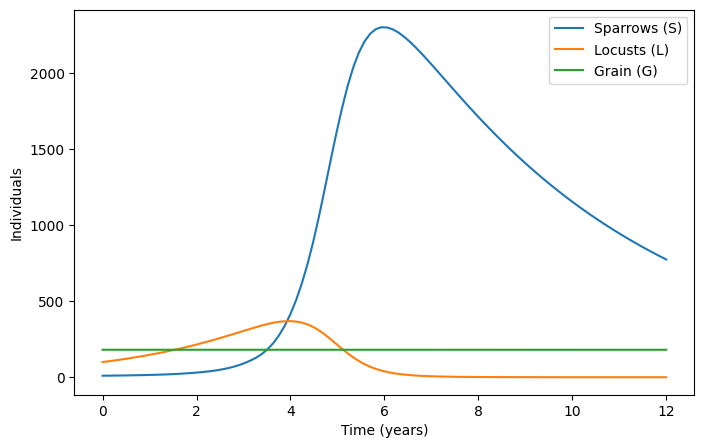

S [  10.      14.841   28.998   80.288  339.299 1417.709 2291.506 2131.911
 1795.292 1486.962 1227.125 1011.638  833.681]
L [1.00000e+02 1.45675e+02 2.10420e+02 2.95964e+02 3.68629e+02 2.52046e+02
 5.47260e+01 9.08300e+00 1.99300e+00 6.01000e-01 2.38000e-01 1.19000e-01
 7.20000e-02]
G [180.93  180.929 180.927 180.924 180.918 180.901 180.865 180.825 180.791
 180.762 180.739 180.719 180.703]


In [50]:
#        [a1,     a2,   a3,  a4,  b1,  b4,  b5,     c1,   c2,   c3]
params = [0.005,  1e-7, 0.2, 0.0, 0.5, 0.1, 0.001,  10.0, 1e-7, 5e-8]


t_span = (0, 12)
t_eval = np.linspace(0, 12, 100)

sol = solve_ivp(system, t_span, y0, t_eval=t_eval, args=tuple(params))


plt.figure(figsize=(8,5))
plt.plot(sol.t, sol.y[0], label='Sparrows (S)')
plt.plot(sol.t, sol.y[1], label='Locusts (L)')
plt.plot(sol.t, sol.y[2], label='Grain (G)')
plt.xlabel('Time (years)')
plt.ylabel('Individuals') # Say an individual of grain is a kilogram. 
plt.legend()
plt.show()

for name, series in zip(['S', 'L', 'G'], sol.y):
    print(name, np.round(series[::8], 3))

In [58]:
"""
I wrapped everything to be able to accept inputs for Eh and Ef, sparrow hunting and grain harvesting efforts. 
"""
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

years = [1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965]
rice_production = [-39.69, -7.51, -44.61, 0, -32.53, -43.36, -59.23, -76.33, -85.63, -23.83, -30.49, -29.0]
positive_rice_production = [(val + 100.0) * 3 for val in rice_production]

def system(t, y, Eh, Ef, *params): 
    S, L, G = y
    a1, a2, a3, a4, b1, b4, b5, c1, c2, c3 = params
    
    dS = (a1 * S * L) + (a2 * S * G) - (a3 * S) - (a4 * Eh * S)
    dL = (b1 * L) - (b4 * L) - (b5 * S * L) 
    dG = (c1 * Ef) - (c2 * G * S) - (c3 * G * L)

    return [dS, dL, dG]


S0 = 10
L0 = 100
G0 = positive_rice_production[0]
y0 = [S0, L0, G0]

#        [a1,     a2,   a3,  a4,  b1,  b4,  b5,   c1,   c2,   c3]
params = [0.005,  1e-7, 0.2, 0.0, 0.5, 0.1, 0.01, 10.0, 1e-7, 5e-8]

t_span = (0, 12)
t_eval = np.linspace(0, 12, 100)


def run_simulation(Eh=0.0, Ef=0.0):
    """Simulate and optionally plot the system for given hunting/farming efforts."""
    sol = solve_ivp(system, t_span, y0, t_eval=t_eval, args=(Eh, Ef, *params))

    plt.figure(figsize=(8,5))
    plt.plot(sol.t, sol.y[0], label=f'Sparrows')
    plt.plot(sol.t, sol.y[1], label=f'Locusts')
    plt.plot(sol.t, sol.y[2], label=f'Grain')
    plt.xlabel('Time (years)')
    plt.ylabel('Individuals / Index')
    plt.title(f'Simulation: Eh={Eh}, Ef={Ef}')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Year |   S (sparrows)   |   L (locusts)   |   G (grain)")
    print("-" * 52)
    for year, S, L, G in zip(years, *sol.y):
        print(f"{year:<5} | {S:>15.3f} | {L:>15.3f} | {G:>15.3f}")

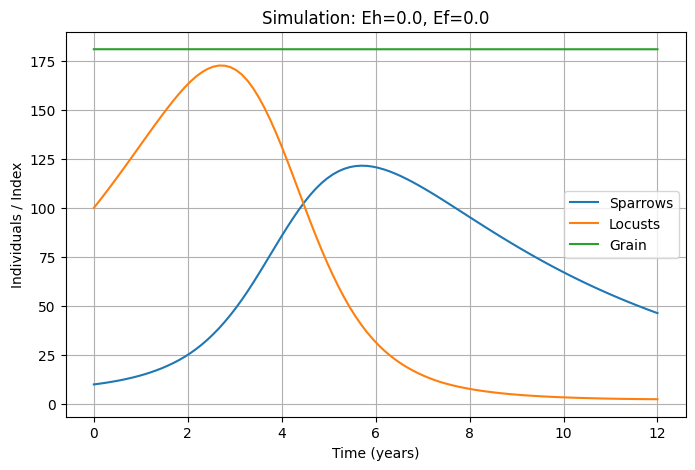

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          10.000 |         100.000 |         180.930
1955  |          10.382 |         103.680 |         180.930
1956  |          10.803 |         107.442 |         180.930
1957  |          11.267 |         111.280 |         180.930
1958  |          11.779 |         115.187 |         180.929
1959  |          12.343 |         119.156 |         180.929
1960  |          12.965 |         123.175 |         180.929
1961  |          13.652 |         127.228 |         180.929
1962  |          14.410 |         131.299 |         180.929
1963  |          15.248 |         135.369 |         180.929
1964  |          16.176 |         139.414 |         180.928
1965  |          17.201 |         143.409 |         180.928


In [59]:
run_simulation(Eh=0.0, Ef=0.0)

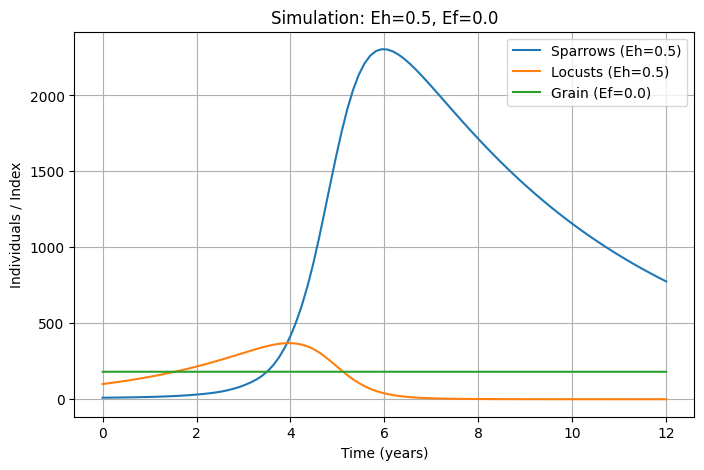

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          10.000 |         100.000 |         180.930
1955  |          10.385 |         104.838 |         180.930
1956  |          10.820 |         109.905 |         180.930
1957  |          11.309 |         115.210 |         180.930
1958  |          11.858 |         120.764 |         180.929
1959  |          12.474 |         126.577 |         180.929
1960  |          13.167 |         132.660 |         180.929
1961  |          13.951 |         139.023 |         180.929
1962  |          14.841 |         145.675 |         180.929
1963  |          15.854 |         152.629 |         180.929
1964  |          17.012 |         159.892 |         180.928
1965  |          18.338 |         167.476 |         180.928


In [55]:
run_simulation(Eh=0.5, Ef=0.0)